# Praktek TF-IDF

Nama: Raihan Satriya Bagaskara

NIM: A11.2020.12757

In [1]:
import pandas as pd
import numpy as np

In [6]:
dataset = pd.read_csv('clean_dataset.csv',sep='\t')

In [7]:
dataset.shape

(8402, 1)

In [15]:
dataset.head(10)

,"text,label"
0,I always wrote this series off as being a comp...
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...
2,This movie was so poorly written and directed ...
3,The most interesting thing about Miryang (Secr...
4,"when i first read about ""berlin am meer"" i did..."
5,"I saw this film on September 1st, 2005 in Indi..."
6,I saw a screening of this movie last night. I ...
7,William Hurt may not be an American matinee id...
8,IT IS A PIECE OF CRAP! not funny at all. durin...
9,I'M BOUT IT(1997)<br /><br />Developed & publi...


In [13]:
dataset_feature = dataset['text,label'].astype(str)

In [14]:
dataset_feature

0       I always wrote this series off as being a comp...
1       1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...
2       This movie was so poorly written and directed ...
3       The most interesting thing about Miryang (Secr...
4       when i first read about "berlin am meer" i did...
                              ...                        
8397    This is the kind of picture John Lassiter woul...
8398    A MUST SEE! I saw WHIPPED at a press screening...
8399    NBC should be ashamed. I wouldn't allow my chi...
8400    This movie is a clumsy mishmash of various gho...
8401    Formula movie about the illegitimate son of a ...
Name: text,label, Length: 8402, dtype: object

In [17]:
dataset_label = dataset['text,label']

In [19]:
dataset_label

0       I always wrote this series off as being a comp...
1       1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...
2       This movie was so poorly written and directed ...
3       The most interesting thing about Miryang (Secr...
4       when i first read about "berlin am meer" i did...
                              ...                        
8397    This is the kind of picture John Lassiter woul...
8398    A MUST SEE! I saw WHIPPED at a press screening...
8399    NBC should be ashamed. I wouldn't allow my chi...
8400    This movie is a clumsy mishmash of various gho...
8401    Formula movie about the illegitimate son of a ...
Name: text,label, Length: 8402, dtype: object

#Distribusi Label

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
dataset[['text', 'label']] = dataset['text,label'].str.split(',', 1, expand=True)

<ipython-input-30-663cc0c9ee04>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dataset[['text', 'label']] = dataset['text,label'].str.split(',', 1, expand=True)


In [31]:
dataset['label'] = pd.to_numeric(dataset['label'], errors='coerce')

<ipython-input-32-3a9fef88d6d3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['label'].dropna(), label=f'Target Variable, Skew: {dataset["label"].skew():.2f}')


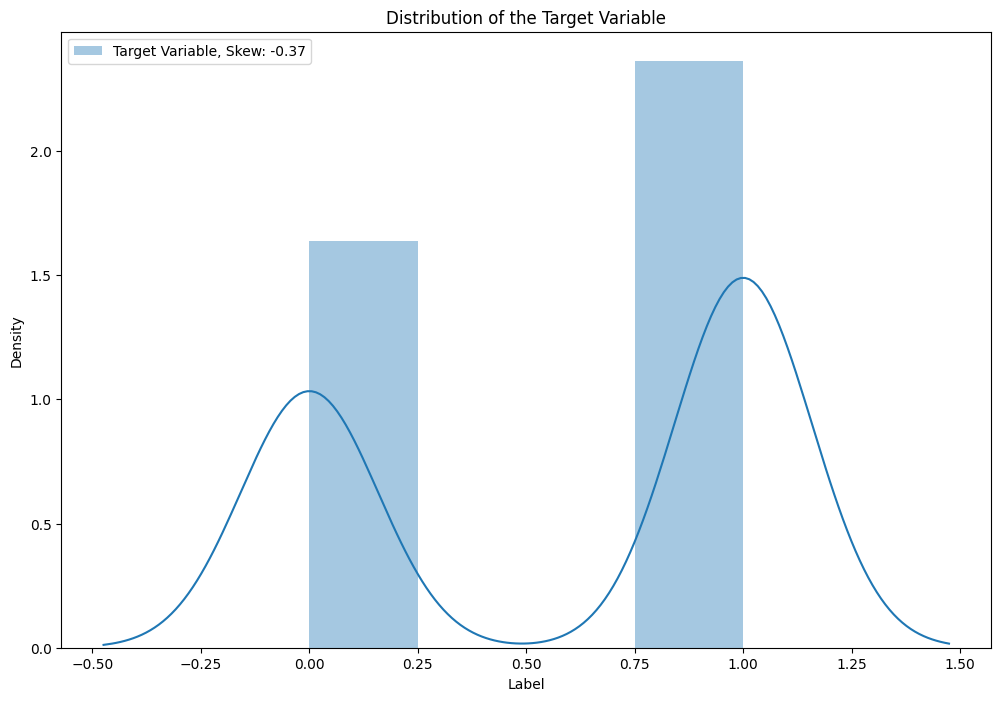

In [32]:
plt.figure(figsize=(12, 8))
sns.distplot(dataset['label'].dropna(), label=f'Target Variable, Skew: {dataset["label"].skew():.2f}')
plt.legend(loc='best')
plt.title('Distribution of the Target Variable')
plt.xlabel('Label')
plt.ylabel('Density')
plt.show()

In [40]:
dataset[['text', 'label']] = dataset['text,label'].str.split(',', 1, expand=True)

<ipython-input-40-663cc0c9ee04>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dataset[['text', 'label']] = dataset['text,label'].str.split(',', 1, expand=True)


In [41]:
dataset['label'] = pd.to_numeric(dataset['label'], errors='coerce')

---------

#POSITIVE WORDS

In [42]:
positive_reviews = dataset[dataset['label'] == 1]

In [44]:
display(positive_reviews.head())

,"text,label",text,label
37,I just found the IMDb and searched this film a...,I just found the IMDb and searched this film a...,1.0
85,I've been watching Buffy the Vampire Slayer an...,I've been watching Buffy the Vampire Slayer an...,1.0
114,After watching the series premiere of Talk Sho...,After watching the series premiere of Talk Sho...,1.0
204,well i wasn't sure what the film was going to ...,well i wasn't sure what the film was going to ...,1.0
251,There are few really hilarious films about sci...,There are few really hilarious films about sci...,1.0


In [85]:
Positive_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_tf_idf = Positive_tf_idf_vect.fit_transform(positive_reviews["text"].values)

In [46]:
Positive_tf_idf.shape

(173, 10071)

In [48]:
features_Pos = Positive_tf_idf_vect.get_feature_names_out()

In [49]:
idfValues_Pos = Positive_tf_idf_vect.idf_

In [50]:
a = dict(zip(features_Pos, 9 - idfValues_Pos))

In [51]:
sortedDict_Pos = sorted(a.items(), key = lambda a: a[1], reverse = True)

In [52]:
for i in range(200):
    print(sortedDict_Pos[i])

('the', 7.946890174686052)
('and', 7.909848903005702)
('this', 7.851579994881726)
('to', 7.782587123394775)
('it', 7.753599586521523)
('is', 7.731293829007225)
('of', 7.692974964705089)
('in', 7.475673689015107)
('that', 7.475673689015107)
('with', 7.405292892253307)
('movie', 7.351804207302321)
('was', 7.340754371115736)
('for', 7.295291997038978)
('but', 7.259785308582069)
('have', 7.259785308582069)
('on', 7.259785308582069)
('one', 7.210392553252492)
('good', 7.117610819801526)
('very', 7.117610819801526)
('be', 7.075051205382731)
('not', 7.075051205382731)
('you', 7.0456373201764375)
('as', 7.030599442811896)
('film', 7.030599442811896)
('so', 6.951818564958782)
('my', 6.918482144691191)
('all', 6.90138771133189)
('if', 6.90138771133189)
('of the', 6.90138771133189)
('at', 6.883995968620021)
('out', 6.883995968620021)
('an', 6.8662963915206205)
('great', 6.8662963915206205)
('br', 6.829928747349745)
('br br', 6.829928747349745)
('time', 6.829928747349745)
('are', 6.811236614337593

In [53]:
!pip3 install wordcloud

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [71]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

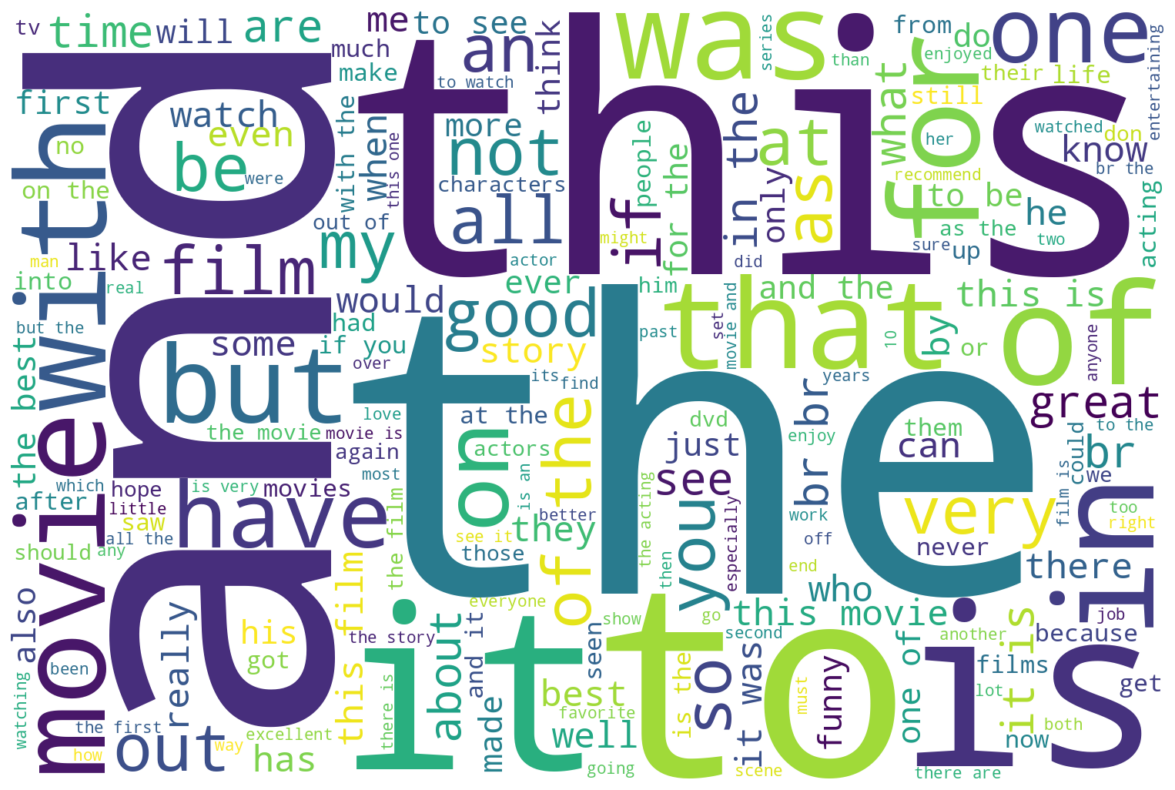

In [72]:
PlotWordCloud(a)

------------

#NEUTRAL WORDS

In [60]:
dataset[['text', 'label']] = dataset['text,label'].str.split(',', 1, expand=True)

<ipython-input-60-663cc0c9ee04>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dataset[['text', 'label']] = dataset['text,label'].str.split(',', 1, expand=True)


In [61]:
dataset['label'] = pd.to_numeric(dataset['label'], errors='coerce')

In [62]:
neutral_reviews = dataset[dataset['label'] == 0]

In [63]:
Neutral_tf_idf_vect = TfidfVectorizer()
X_neutral_tfidf = Neutral_tf_idf_vect.fit_transform(neutral_reviews['text'])

In [64]:
features_neutral = Neutral_tf_idf_vect.get_feature_names_out()

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def PlotWordCloud(features, tfidf_vectorizer):
    # Get the feature names and their corresponding TF-IDF scores
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_vectorizer.idf_

    # Create a dictionary with feature names and their TF-IDF scores
    word_freq = {feature: tfidf_scores[i] for i, feature in enumerate(feature_names)}

    wordcloud = WordCloud(background_color="white", width=1500, height=1000)
    wordcloud.generate_from_frequencies(frequencies=word_freq)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()




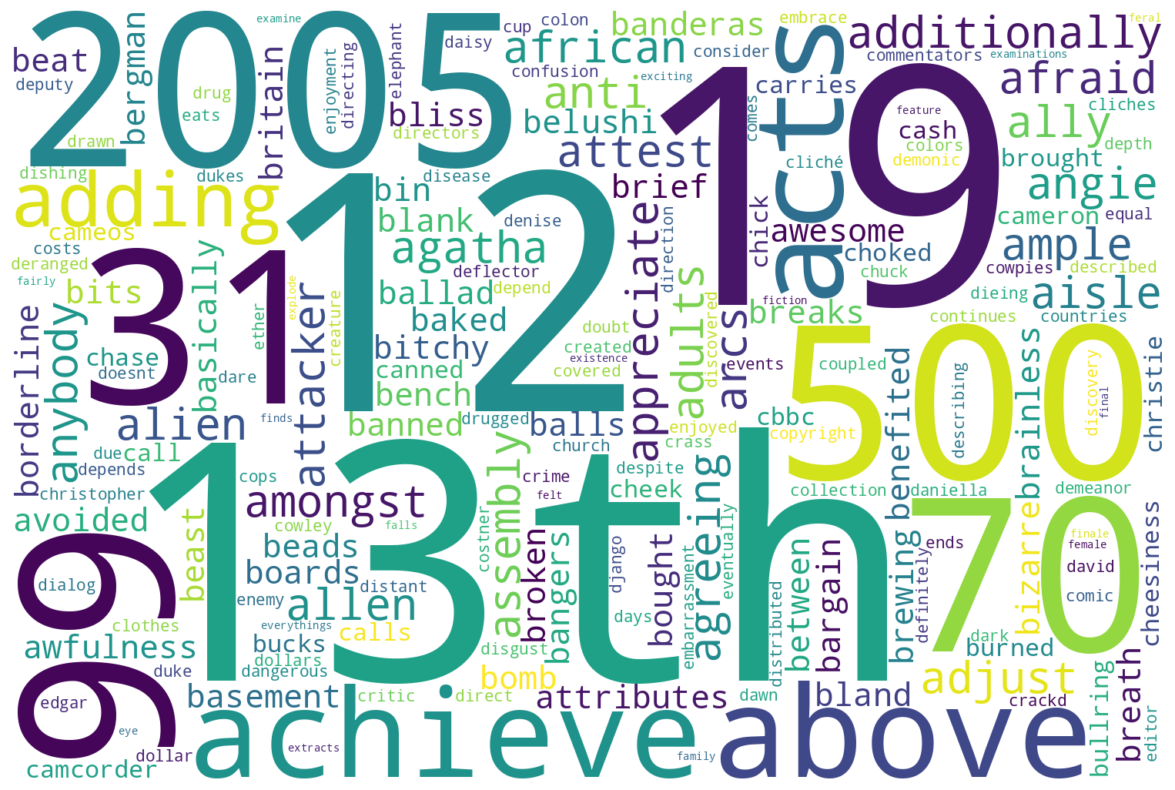

In [76]:
PlotWordCloud(features_neutral, Neutral_tf_idf_vect)

--------

#NEGATIVE WORDS

In [77]:
dataset[['text', 'label']] = dataset['text,label'].str.split(',', 1, expand=True)

<ipython-input-77-663cc0c9ee04>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dataset[['text', 'label']] = dataset['text,label'].str.split(',', 1, expand=True)


In [78]:
dataset['label'] = pd.to_numeric(dataset['label'], errors='coerce')

In [79]:
negative_reviews = dataset[dataset['label'] == -1]

In [98]:
Negative_tf_idf_vect = TfidfVectorizer()
X_negative_tfidf = Negative_tf_idf_vect.fit_transform(negative_reviews['text'])

ValueError: ignored